<a href="https://colab.research.google.com/github/imou-imane/Telecom-churn-files/blob/master/Data2Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jeu de données UCI

In [ ]:
# Packages
import pandas as pd
import numpy as np


from sklearn import svm
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.ensemble import RandomForestClassifier

# Graph
#from mlxtend.plotting import plot_decision_regions

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

**Récupération des données depuis github**
Sur le local on utilise le fichier 'churn.csv'

In [ ]:
url= 'https://raw.githubusercontent.com/imou-imane/Telecom-churn-files/master/churn.csv'
dataframe = pd.read_csv(url)

In [ ]:
dataframe.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [ ]:
dataframe.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
#Appel des fonctions
def func():
    accRF, matRF = foretAleatoire(X_train, X_test, y_train, y_test)
    accDT, matDT = arbre_decision(X_train, X_test, y_train, y_test)
    #svm_func_gridS(df_dummies)
    svm_fun(X_train, X_test, y_train, y_test)

    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    test = pd.concat([y_train, X_train ], axis=1)
    test.columns = dataframe.columns.values
    #graphChurn(test,'test')
    ##display(test.head())

## Matrice de correlation

In [ ]:
#correlation entre les variables
def correlations(dataframe,x,y ,show_chart = True):
    fig = plt.figure(figsize = (x,y))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True, 
                    cmap= "Blues")
    else:
      sns.heatmap(corr, 
                    cmap= "Blues")
        
    return corr



## Hold-out

In [ ]:
# Seperating the target variable
def splitdataset(dataset):
    # Seperating the target variable
    X = dataset.drop("churn", axis=1).values
    cible = dataset["churn"].copy().values #churn
    # deviding data into traning and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, cible, test_size=0.3) #70% training and 30% test
    return X_train, X_test, y_train, y_test

## Grid search

In [ ]:
def svm_func_gridS(dataset):
    svm_cl = svm.SVC()
    Cs = [2.9,3,3.001,np.log2(2.723),np.log2(2.8),np.log2(2.82),np.log2(2), np.log2(2.722)]
    gammas = [0.12,0.12001,0.11932,3,1.5,'auto','scale']
    parametre = [{'kernel':['linear'], 'C':Cs},
                 {'kernel':['rbf'],'gamma': gammas,'C':Cs}]
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    classifieur = GridSearchCV(estimator=svm.SVC(),param_grid=parametre, cv=cv)
    
    features = dataset.columns.values
    scaler2 = MinMaxScaler(feature_range = (0,1))
    scaler2.fit(dataset)
    dataset = pd.DataFrame(scaler2.transform(dataset))
    dataset.columns = features
    X_train, X_test, y_train, y_test = splitdataset(dataset)
    
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    classifieur.fit(X_train,y_train)
    X_test = scaler.fit_transform(X_test)

    print ('Précision du svm + grid search: ')
    print(precision_score(y_test,classifieur.predict(X_test))*100) 
    
    print('gamma',classifieur.best_estimator_.gamma)
    print('C',classifieur.best_estimator_.C)
    print('Kernel',classifieur.best_estimator_.kernel)


## Arbre de decision

In [ ]:
def arbre_decision(X_train, X_test, y_train, y_test):
    clf = tree.DecisionTreeClassifier()
    
    clf.fit(X_train,y_train)
    print('\nDecision tree')
    print ('Accuracy: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100)
    
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test))) 
    pred = clf.predict(X_test)
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Arbre de decisoin')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()
    
    return precision_score(y_test,pred),confusion_matrix(y_test,pred)   

## Foret aléatoire

In [ ]:
def foretAleatoire(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    
    clf.fit(X_train,y_train)
    print('Foret aleatoire')
    print ('Accuracy: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100)
    
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test))) 
    pred = clf.predict(X_test)

  
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Foret aleatoire')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()
    
    return precision_score(y_test,pred),confusion_matrix(y_test,pred)


## Svm hyperpaarametré

In [ ]:
def svm_fun(X_train, X_test, y_train, y_test):
    clf = svm.SVC(kernel='rbf',gamma=0.12, C=3.0, probability=True)
    
    
    scaler = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    clf.fit(X_train,y_train)
    
    scaler2 = preprocessing.StandardScaler()
    X_test = scaler2.fit_transform(X_test)
    pred = clf.predict(X_test)
    
    print('\nModele proposé')
    print ('Accuracy: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100)
    
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    
    print(confusion_matrix(y_test,pred)) 
  

    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('Hyper SVM')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

### Fonction svm de base

In [ ]:
def svm_fun1(dataset):
    clf = svm.SVC(probability=True)
    X_train, X_test, y_train, y_test = splitdataset(dataset)
    
    
    
    
    clf.fit(X_train,y_train)
    
    
    print ('Accuracy svm: ')
    print(accuracy_score(y_test,clf.predict(X_test))*100) 
    print ('Precision: ')
    print(precision_score(y_test,clf.predict(X_test))*100)
    print ('Recall: ')
    print(recall_score(y_test,clf.predict(X_test))*100)
    
    print ('F1-score: ')
    print(f1_score(y_test,clf.predict(X_test))*100)
    print(confusion_matrix(y_test,clf.predict(X_test)))  
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    
    plt.title('SVM non parametre')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Taux de vrai positive')
    plt.xlabel('Taux de faux negative')
    plt.show()

## Pourcentage de churn (fonction)

In [ ]:
def graphChurn(dataframe, name=''):
    ax=(dataframe['churn'].value_counts().plot(kind = 'bar',
                                               rot = 0, 
                                               color=['grey','silver']))
    ax.set_ylabel('Nombre de clients',size = 14) # titres des axes
    ax.set_xlabel('Churn',size = 14)
    #ax.set_xticks(tiks,minor=False)
    ax.set_xticklabels(('Non-Churneurs','Chuners'))
    ax.set_title('Churn '+name, size = 14)


## Preparation des données

In [ ]:
#def main():
    #Recuperation des données
    #url= 'https://raw.githubusercontent.com/imou-imane/Telecom-churn-files/master/churn.csv'
    #dataframe = pd.read_csv(url)
    #Affichage des 5 premiers lignes
    #print(dataframe.head())
    
    #Types des données
    #dataframe.dtypes
    
    #dataframe.columns recupere le "title" de la colonne
    #dataframe[item].unique()  recupere les éléments de la colonne sans repetition
    #for j in dataframe.columns:
     #   print(j)
      #  print (dataframe[j].unique())
        
    

    #Convertion des données
     

    #Metrre les valeurs "yes" "no" en 1 et 0
columns_to_convert =['voicemailplan',
                       'internationalplan',
                       'churn']
for item in columns_to_convert:
  dataframe[item].replace(to_replace='yes', value=1, inplace=True)
  dataframe[item].replace(to_replace='no',  value=0, inplace=True)
        
columns_to_convert =['accountlength',
                        'numbervmailmessages',
                        'totaldaycalls',
                        'totalevecalls',
                        'totalnightcalls',
                        'totalintlcalls',
                        'numbercustomerservicecalls']
    
for item in columns_to_convert:
  dataframe[item] = dataframe[item].astype(float)
      
    #Traiter le cas des null
    # dataframe.isnull().sum(axis = 0) y a pas
    
churns= dataframe['churn']
#correlation = correlations(dataframe)
    
df_dummies = pd.get_dummies(dataframe)
    #display(df_dummies.head())
    
df_label = dataframe.apply(LabelEncoder().fit_transform)
    
    
X_train, X_test, y_train, y_test = splitdataset(df_label)
    
    
    


## Affichage de matrice de corrélation

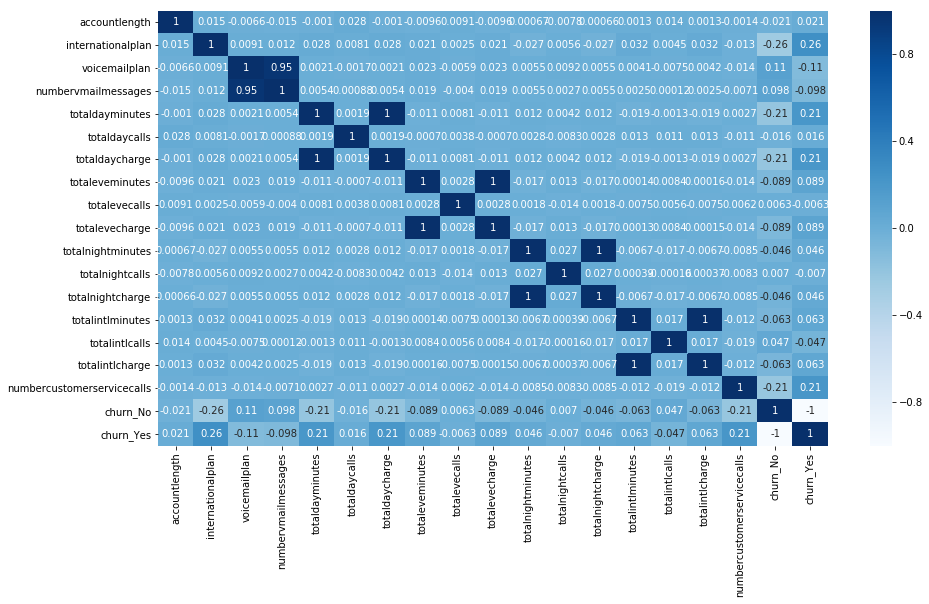

In [ ]:
mat = correlations(df_dummies, 15,8, True)

Étude de corrélation

In [ ]:
cor_t = abs(mat['churn'])

#Selecting highly correlated features
relevant_features = cor_t[cor_t>0.1]
relevant_features

KeyError: ignored

## Corrélation entre churn et totaldayminutes


In [ ]:
a= df_label.groupby(["totaldayminutes", "churn"]).size().unstack(level=0)


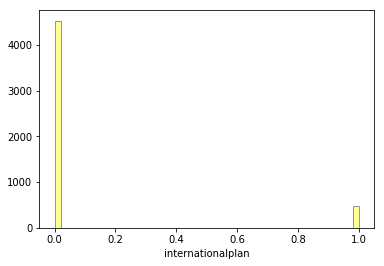

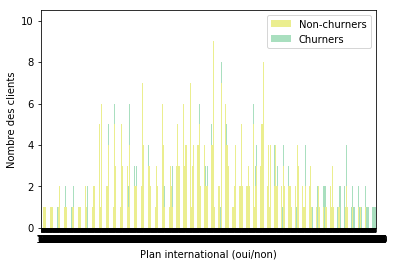

In [ ]:
ax = sns.distplot(df_label['internationalplan'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
                  color='yellow',
             kde_kws={'linewidth': 4})
ax =(df_label.groupby(['totaldayminutes','churn']).size().unstack()).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,

                                                        color=['#ebee8f','#a9dfbf']
                                                                           )
ax.set_xticks(np.arange(2),('Oui','Non'))
ax.set_ylabel('Nombre des clients')

ax.set_xlabel('Plan international (oui/non)')
ax.legend(('Non-churners','Churners'))

## Nombre des churners et non churners

In [ ]:
graphChurn(dataframe)

## Résultats

### Foret aleatoires

In [ ]:
accRF, matRF = foretAleatoire(X_train, X_test, y_train, y_test)
accDT, matDT = arbre_decision(X_train, X_test, y_train, y_test)
#svm_func_gridS(df_dummies)

### SVM hyperparamétré

In [ ]:
svm_fun(X_train, X_test, y_train, y_test)


### SVM non paramétré

In [ ]:
svm_fun1(df_label)

In [ ]:
if __name__=='__main__':
    main()